Importing libraries

In [1]:
import numpy as np
import pandas as pd

Reading input and output file

In [2]:
t1=pd.read_csv('Telecom_Churn_Prediction_train.csv')
t2=pd.read_csv('Telecom_Churn_Prediction_test.csv')

In [3]:
t1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
1,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
2,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


In [4]:
t2.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15


In [5]:
t1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
t1.shape

(5634, 21)

checking the data type and null values

In [7]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
customerID          5634 non-null object
gender              5634 non-null object
SeniorCitizen       5634 non-null int64
Partner             5634 non-null object
Dependents          5634 non-null object
tenure              5634 non-null int64
PhoneService        5634 non-null object
MultipleLines       5634 non-null object
InternetService     5634 non-null object
OnlineSecurity      5634 non-null object
OnlineBackup        5634 non-null object
DeviceProtection    5634 non-null object
TechSupport         5634 non-null object
StreamingTV         5634 non-null object
StreamingMovies     5634 non-null object
Contract            5634 non-null object
PaperlessBilling    5634 non-null object
PaymentMethod       5634 non-null object
MonthlyCharges      5634 non-null float64
TotalCharges        5627 non-null float64
Churn               5634 non-null object
dtypes: float64(2), int64(2), ob

This shows total charge has 7 missing value 

overall distribution of continous columns

In [8]:
t1.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5627.000000
mean,0.163649,32.308307,64.895483,2283.658104
std,0.369990,24.554629,29.924263,2261.886781
min,0.000000,0.000000,18.400000,18.800000
25%,0.000000,9.000000,37.062500,399.800000
50%,0.000000,29.000000,70.400000,1398.600000
75%,0.000000,55.000000,89.837500,3823.325000
max,1.000000,72.000000,118.650000,8594.400000


In [9]:
t1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
Churn               0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Check if there is any outlier in Total charge as we need to fill the missing value. If oultlier is present we won't fill it with mean

C:\Users\Nitish\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Nitish\Anaconda3\lib\site-packages\matplotlib\cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Nitish\Anaconda3\lib\site-packages\matplotlib\cbook.py:2073: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Nitish\Anaconda3\lib\site-packages\matplotlib\cbook.py:2081: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Nitish\Anaconda3\lib\site-packages\matplotlib\cbook.py:2082: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'boxes': [<matplotlib.lines.Line2D at 0x16bdb4aea90>],
 'caps': [<matplotlib.lines.Line2D at 0x16bdb4b6d68>,
 'fliers': [<matplotlib.lines.Line2D at 0x16bdb4c6c18>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x16bdb4bfd68>],
 'whiskers': [<matplotlib.lines.Line2D at 0x16bdb4aec50>,
  <matplotlib.lines.Line2D at 0x16bdb4b6ba8>]}

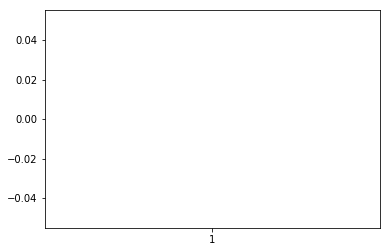

In [13]:
plt.boxplot(t1['TotalCharges'])

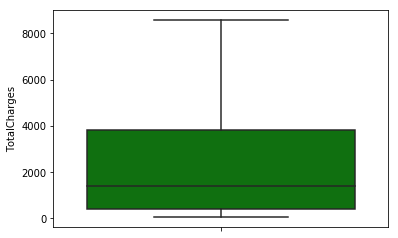

In [12]:
sns.boxplot(t1['TotalCharges'],orient="v", color="green")

As there were no outlier so will fill it with mean else median. As columns is continous missing values are filled with mean of the column

In [14]:
t1['TotalCharges'].fillna(value=t1['TotalCharges'].mean(),inplace=True)

Verify if all the missing values are filled

In [15]:
t1.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
t1['SeniorCitizen'].value_counts()

0    4712
1     922
Name: SeniorCitizen, dtype: int64

In [18]:
t1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Checking various categories of categorical variable

In [19]:
print(t1['gender'].value_counts())
print(t1['SeniorCitizen'].value_counts())
print(t1['Partner'].value_counts())
print(t1['Dependents'].value_counts())
print(t1['PhoneService'].value_counts())
print(t1['MultipleLines'].value_counts())
print(t1['InternetService'].value_counts())
print(t1['OnlineSecurity'].value_counts())
print(t1['OnlineBackup'].value_counts())
print(t1['DeviceProtection'].value_counts())
print(t1['TechSupport'].value_counts())
print(t1['StreamingTV'].value_counts())
print(t1['StreamingMovies'].value_counts())
print(t1['Contract'].value_counts())
print(t1['PaperlessBilling'].value_counts())
print(t1['PaymentMethod'].value_counts())

Male      2858
Female    2776
Name: gender, dtype: int64
0    4712
1     922
Name: SeniorCitizen, dtype: int64
No     2906
Yes    2728
Name: Partner, dtype: int64
No     3971
Yes    1663
Name: Dependents, dtype: int64
Yes    5084
No      550
Name: PhoneService, dtype: int64
No                  2716
Yes                 2368
No phone service     550
Name: MultipleLines, dtype: int64
Fiber optic    2470
DSL            1968
No             1196
Name: InternetService, dtype: int64
No                     2823
Yes                    1615
No internet service    1196
Name: OnlineSecurity, dtype: int64
No                     2474
Yes                    1964
No internet service    1196
Name: OnlineBackup, dtype: int64
No                     2507
Yes                    1931
No internet service    1196
Name: DeviceProtection, dtype: int64
No                     2770
Yes                    1668
No internet service    1196
Name: TechSupport, dtype: int64
No                     2267
Yes                

In [20]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for i in replace_cols : 
    t1[i]  = t1[i].replace({'No internet service' : 'No'})

In [21]:
print(t1['OnlineSecurity'].value_counts())
print(t1['OnlineBackup'].value_counts())
print(t1['DeviceProtection'].value_counts())
print(t1['TechSupport'].value_counts())
print(t1['StreamingTV'].value_counts())
print(t1['StreamingMovies'].value_counts())

No     4019
Yes    1615
Name: OnlineSecurity, dtype: int64
No     3670
Yes    1964
Name: OnlineBackup, dtype: int64
No     3703
Yes    1931
Name: DeviceProtection, dtype: int64
No     3966
Yes    1668
Name: TechSupport, dtype: int64
No     3463
Yes    2171
Name: StreamingTV, dtype: int64
No     3432
Yes    2202
Name: StreamingMovies, dtype: int64


In [22]:
t1['MultipleLines']  = t1['MultipleLines'].replace({'No phone service' : 'No'})

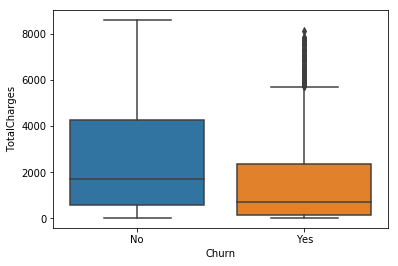

In [23]:
sns.boxplot(x='Churn',y='TotalCharges',data=t1)

Customer having less Total charges more chances of churn

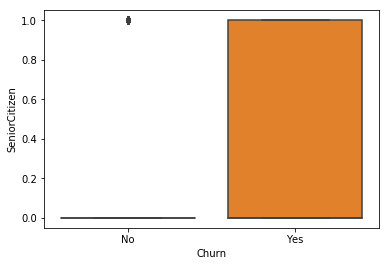

In [24]:
sns.boxplot(x='Churn',y='SeniorCitizen',data=t1)

SeniorCitizen are more chances to churn

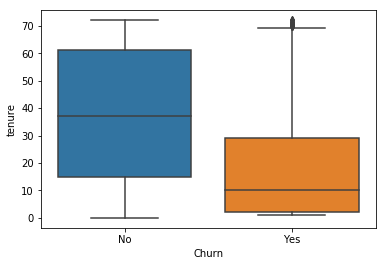

In [25]:
sns.boxplot(x='Churn',y='tenure',data=t1)

Customer with less tenure are more chances of churn

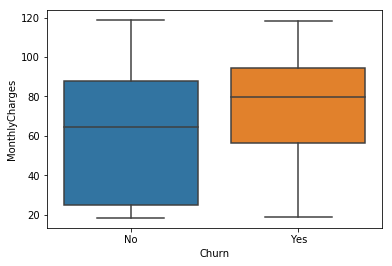

In [26]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=t1)

Customer with high monthly charge more likely to churn

In [27]:
t1["Partner"] = t1["Partner"].replace({"Yes":1,"No":0})

In [28]:
t1["Dependents"] = t1["Dependents"].replace({"Yes":1,"No":0})

In [29]:
t1["PhoneService"] = t1["PhoneService"].replace({"Yes":1,"No":0})

In [30]:
t1["MultipleLines"] = t1["MultipleLines"].replace({"Yes":1,"No":0})

In [31]:
t1["OnlineSecurity"] = t1["OnlineSecurity"].replace({"Yes":1,"No":0})

In [32]:
t1["OnlineBackup"] = t1["OnlineBackup"].replace({"Yes":1,"No":0})

In [33]:
t1["DeviceProtection"] = t1["DeviceProtection"].replace({"Yes":1,"No":0})

In [34]:
t1["TechSupport"] = t1["TechSupport"].replace({"Yes":1,"No":0})

In [35]:
t1["StreamingTV"] = t1["StreamingTV"].replace({"Yes":1,"No":0})

In [36]:
t1["StreamingMovies"] = t1["StreamingMovies"].replace({"Yes":1,"No":0})

In [37]:
t1["PaperlessBilling"] = t1["PaperlessBilling"].replace({"Yes":1,"No":0})

In [38]:
t1["gender"] = t1["gender"].replace({"Male":1,"Female":0})

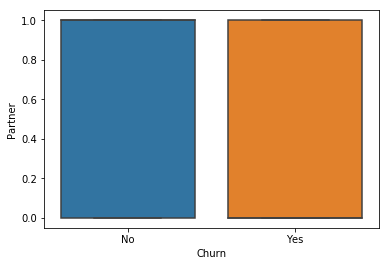

In [72]:
sns.boxplot(x='Churn',y='Partner',data=t1)

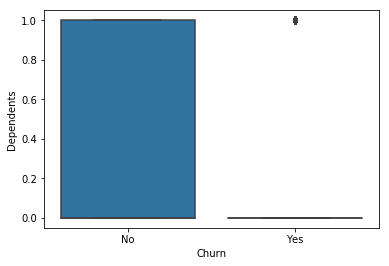

In [73]:
sns.boxplot(x='Churn',y='Dependents',data=t1)

Customer without dependent more likely to churn

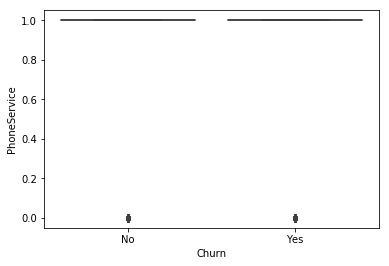

In [74]:
sns.boxplot(x='Churn',y='PhoneService',data=t1)

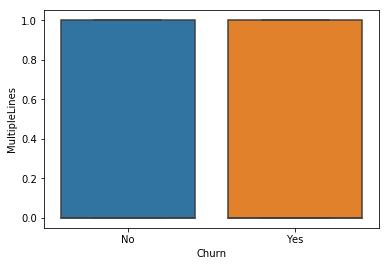

In [75]:
sns.boxplot(x='Churn',y='MultipleLines',data=t1)

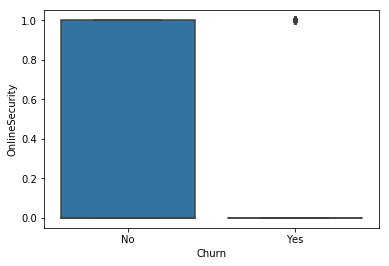

In [76]:
sns.boxplot(x='Churn',y='OnlineSecurity',data=t1)

Customer with no onlinesecurity more likely to churn

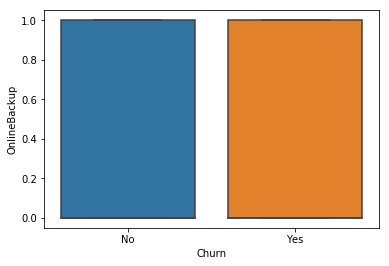

In [77]:
sns.boxplot(x='Churn',y='OnlineBackup',data=t1)

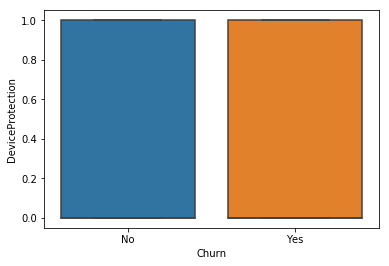

In [78]:
sns.boxplot(x='Churn',y='DeviceProtection',data=t1)

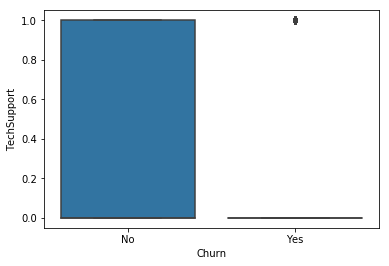

In [79]:
sns.boxplot(x='Churn',y='TechSupport',data=t1)

Customer with no techsupport more likely to churn

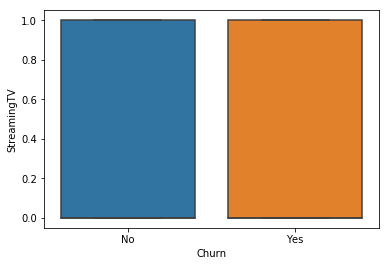

In [80]:
sns.boxplot(x='Churn',y='StreamingTV',data=t1)

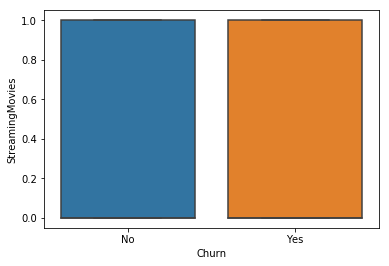

In [81]:
sns.boxplot(x='Churn',y='StreamingMovies',data=t1)

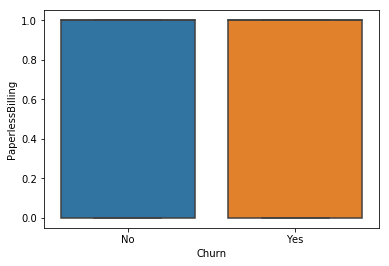

In [82]:
sns.boxplot(x='Churn',y='PaperlessBilling',data=t1)

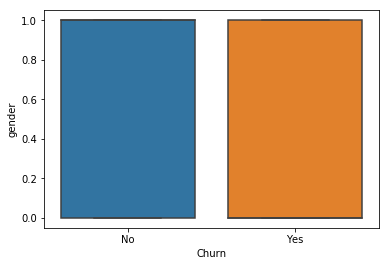

In [83]:
sns.boxplot(x='Churn',y='gender',data=t1)

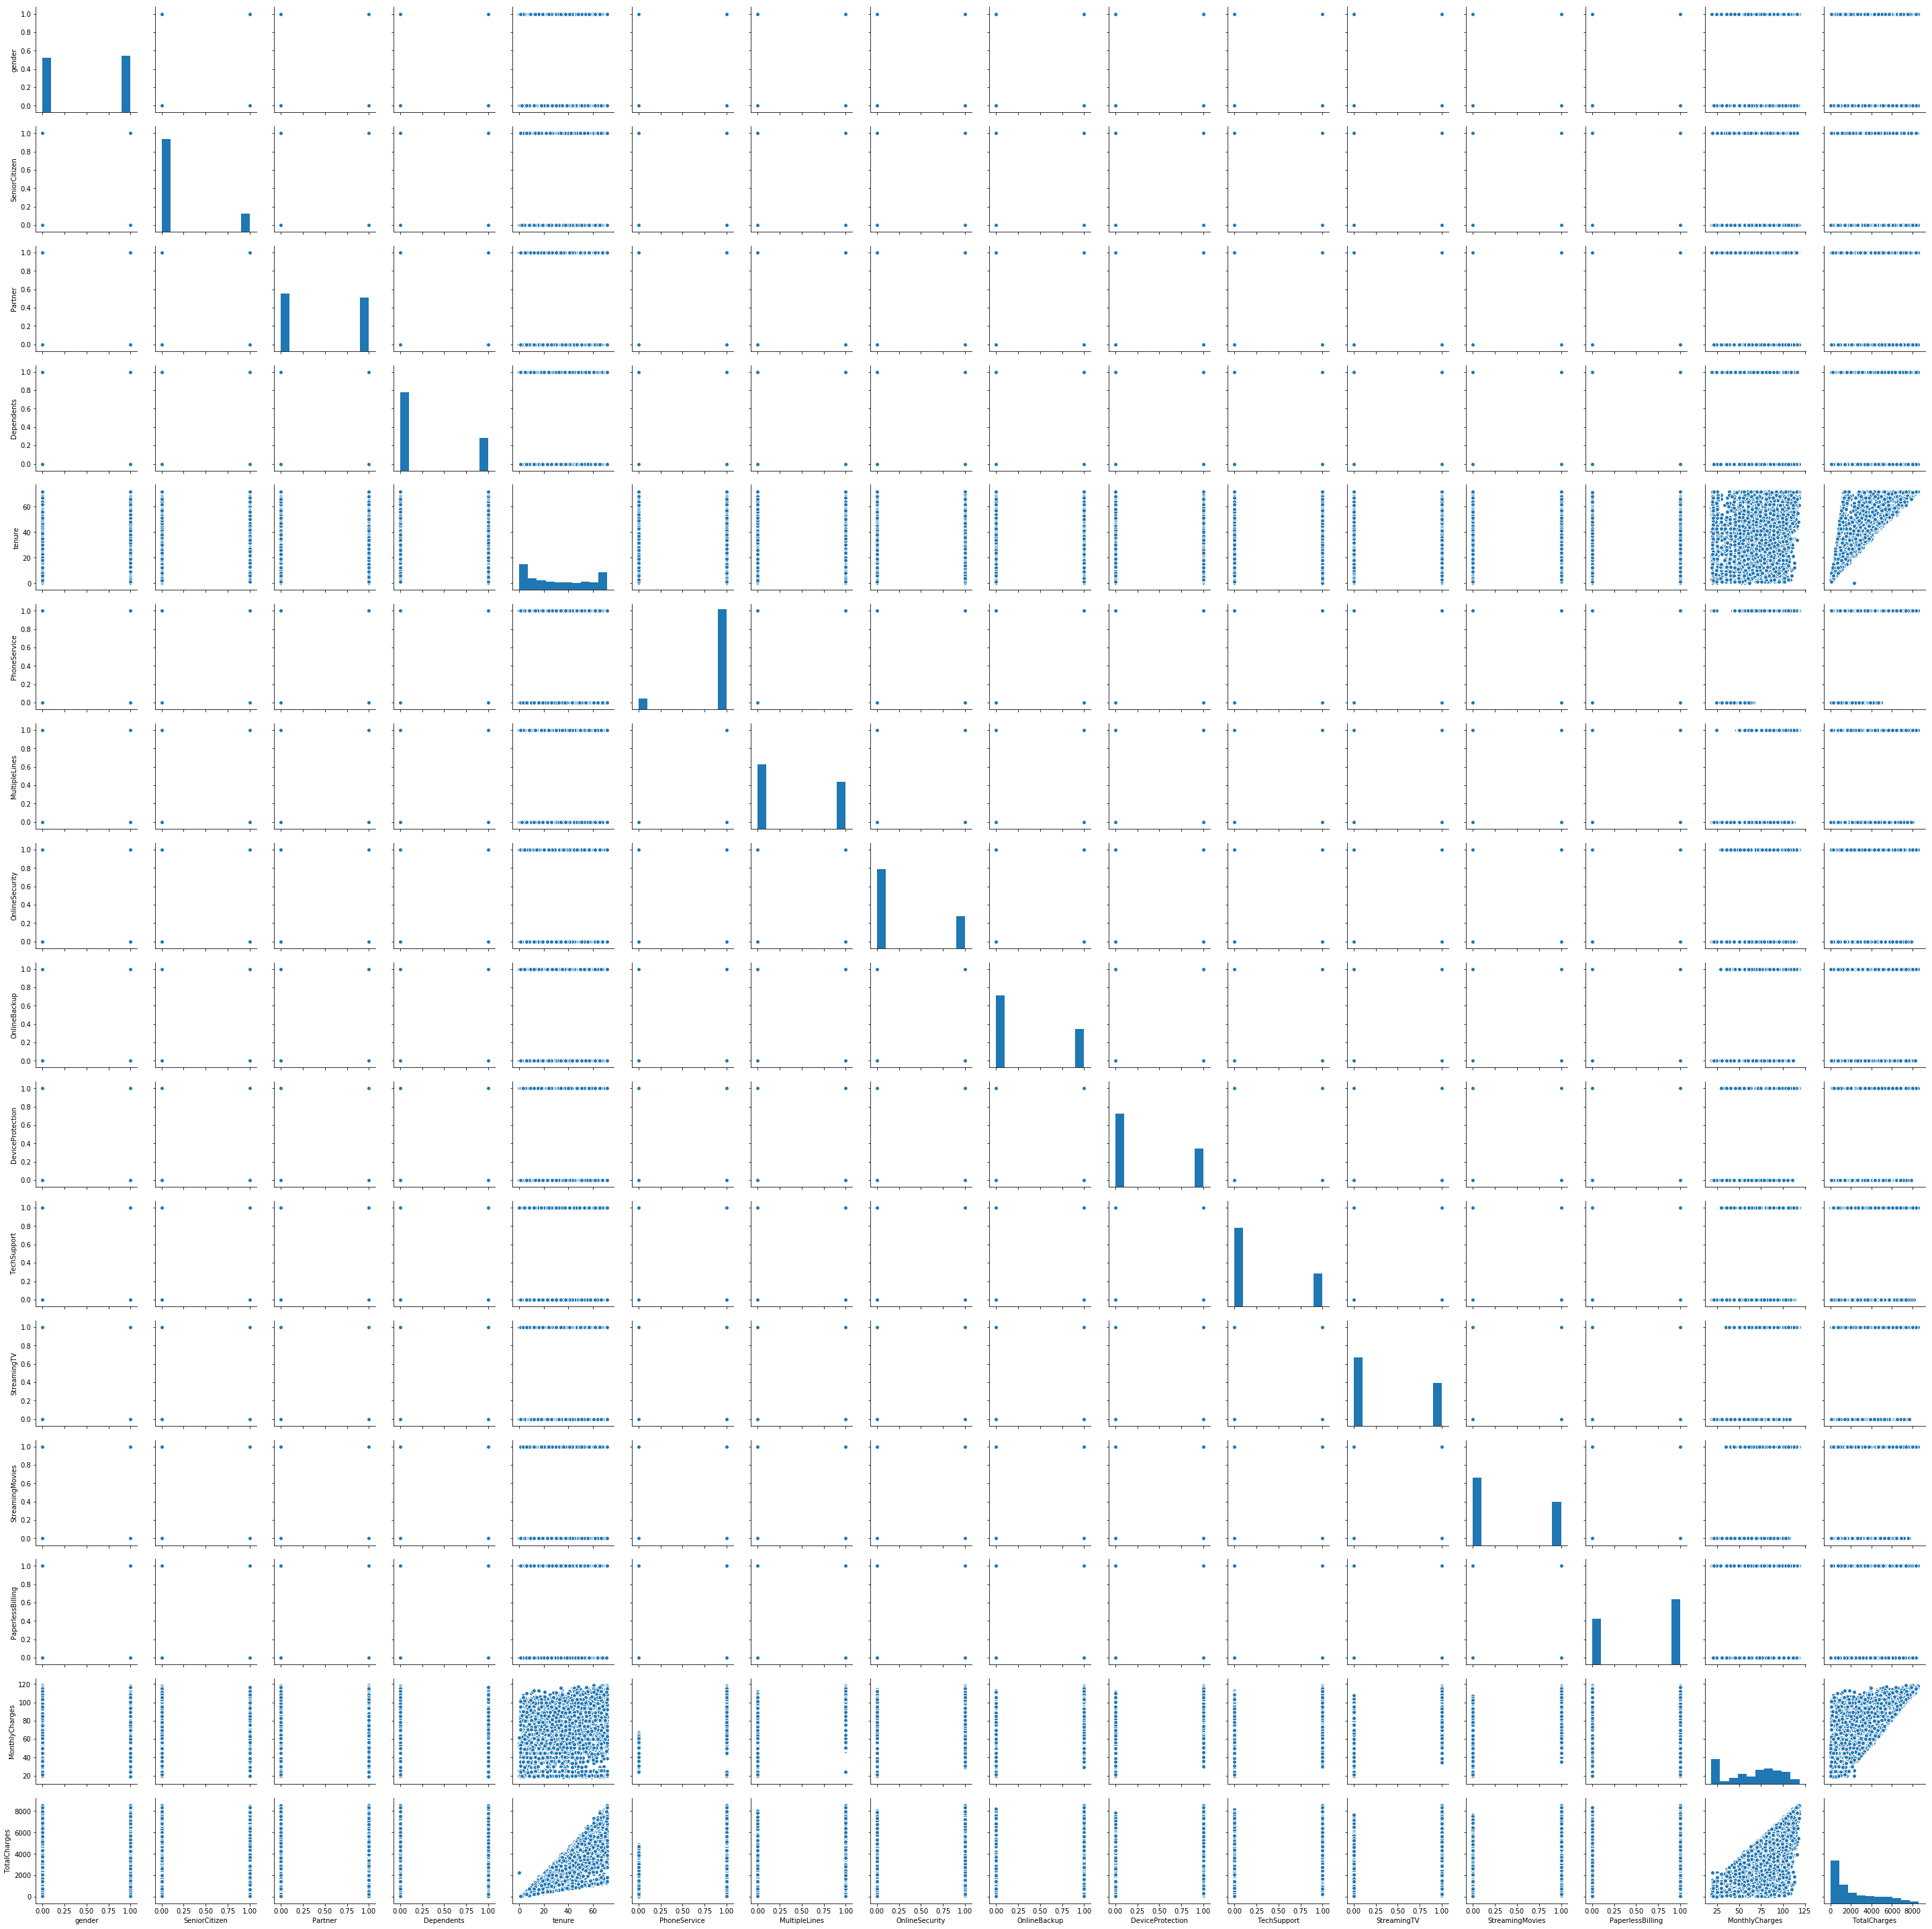

In [39]:
sns.pairplot(t1)

In [40]:
t2=pd.get_dummies((t1.drop(["customerID",'SeniorCitizen','tenure','MonthlyCharges','TotalCharges','gender',"Partner","Dependents","PhoneService","MultipleLines","OnlineSecurity","OnlineBackup","DeviceProtection",'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn'],axis=1)),drop_first=True)

In [41]:
t2.head(1)

,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,0,0


In [42]:
t3=pd.concat([t1,t2],axis=1)

In [43]:
t3.shape

(5634, 28)

In [44]:
t4=t3.drop(["customerID","InternetService",'Contract','PaymentMethod'],axis=1)

In [45]:
t4.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,45,0,0,1,0,1,...,42.3,1840.75,No,0,0,1,0,0,0,0


In [91]:
from sklearn.model_selection import train_test_split
good_columns=t4.drop(['Churn'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(good_columns,t4['Churn'],test_size=0.3,random_state=99)

In [92]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000,max_features='auto',oob_score=True)

In [93]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [94]:
rfc_pred_train = rfc.predict(X_train)
print(pd.crosstab(y_train,rfc_pred_train))

col_0     0     1
Churn            
0      2902     4
1         6  1031


In [95]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,rfc_pred_train))
print ("*********")
print (confusion_matrix(y_train,rfc_pred_train))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2906
          1       1.00      0.99      1.00      1037

avg / total       1.00      1.00      1.00      3943

*********
[[2902    4]
 [   6 1031]]


In [96]:
rfc_pred_test = rfc.predict(X_test)
print(pd.crosstab(y_test,rfc_pred_test))

col_0     0    1
Churn           
0      1138   95
1       242  216


In [97]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred_test))
print ("*********")
print (confusion_matrix(y_test,rfc_pred_test))

             precision    recall  f1-score   support

          0       0.82      0.92      0.87      1233
          1       0.69      0.47      0.56       458

avg / total       0.79      0.80      0.79      1691

*********
[[1138   95]
 [ 242  216]]


In [98]:
features = good_columns.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)

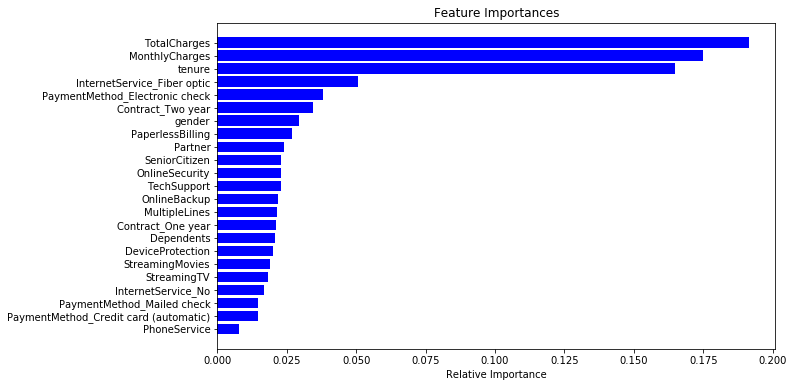

In [99]:
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [100]:
t4["Churn"] = t4["Churn"].replace({"Yes":1,"No":0})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [101]:
import statsmodels.discrete.discrete_model as sm
from statsmodels.api import add_constant
from pandas.core import datetools
import scipy, scipy.stats
X2 = add_constant(X_train)

In [102]:
type(y_train)

pandas.core.series.Series

In [103]:
logit = sm.Logit(y_train, X2)

In [104]:
result = logit.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.416339
         Iterations 8
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.277      
Dependent Variable:        Churn                  AIC:                    3331.2478  
Date:                      2019-04-20 12:48       BIC:                    3481.9605  
No. Observations:          3943                   Log-Likelihood:         -1641.6    
Df Model:                  23                     LL-Null:                -2271.8    
Df Residuals:              3919                   LLR p-value:            4.2578e-252
Converged:                 1.0000                 Scale:                  1.0000     
No. Iterations:            8.0000                                                    
-------------------------------------------------------------------------------------
                                       Coef.  Std.Err.    z    P>|z|   [0.

In [59]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C = 1e9) 

In [60]:
log_reg.fit(X_train,y_train)
pred_train=log_reg.predict(X_train)
pd.crosstab(y_train,pred_train)

col_0,No,Yes
Churn,,
No,2583,309
Yes,465,586


In [61]:
pred_test=log_reg.predict(X_test)

In [62]:
pd.crosstab(y_test,pred_test)

col_0,No,Yes
Churn,,
No,1106,141
Yes,205,239


In [65]:
print(classification_report(y_test,pred_test))
print ("*********")
print (confusion_matrix(y_test,pred_test))

             precision    recall  f1-score   support

         No       0.84      0.89      0.86      1247
        Yes       0.63      0.54      0.58       444

avg / total       0.79      0.80      0.79      1691

*********
[[1106  141]
 [ 205  239]]


In [86]:
from sklearn import metrics

In [105]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.80307510348905975

In [109]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.79716144293317559

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1e9)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8042578356


In [ ]:
# Create a Random forest, Logistic regression and SVM instance:

rf_class = RandomForestClassifier(n_estimators=500)
log_class = LogisticRegression()
svm_class = svm.SVC()

In [108]:
rf = RandomForestClassifier(n_estimators=1000 , oob_score = True,
                                  random_state =50, max_features = "auto",
                                  criterion='gini', min_samples_leaf=3)
rf.fit(X_train, y_train)

# Make predictions
prediction_test = rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.803075103489


In [112]:
from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score

In [114]:
print("Random Forests: ")
print(cross_val_score(rf, good_columns,t4['Churn'], scoring='accuracy', cv = 10))
accuracy = cross_val_score(rf, good_columns,t4['Churn'], scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)
 

 


Random Forests: 
[ 0.80141844  0.79787234  0.78900709  0.81028369  0.77836879  0.77797513
  0.8277087   0.81172291  0.80284192  0.80604982]
Accuracy of Random Forests is:  80.0324884452


In [117]:
print("\n\nLog:")
print(cross_val_score(model, good_columns,t4['Churn'], scoring='accuracy', cv = 10))
accuracy = cross_val_score(model, good_columns,t4['Churn'], scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of log is: " , accuracy)



Log:
[ 0.79432624  0.79078014  0.79964539  0.82269504  0.78191489  0.80284192
  0.80639432  0.81172291  0.79396092  0.8024911 ]
Accuracy of log is:  80.0677287638


In [118]:
print("\n\nSVM:")
print(cross_val_score(model.svm, good_columns,t4['Churn'], scoring='accuracy', cv = 10))
accuracy = cross_val_score(model.svm, good_columns,t4['Churn'], scoring='accuracy', cv = 10).mean() * 100
print("Accuracy of SVM is: " , accuracy)



SVM:


KeyboardInterrupt: 

In [119]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
#k=['rbf', 'linear','poly','sigmoid','precomputed']
k=['linear']
c= list(range(1,3))
g=np.arange(0.1,0.3,0.1)
param_grid=dict(kernel=k, C=c, gamma=g)
new_model=SVC()

In [120]:
grid = GridSearchCV(new_model, param_grid,scoring='accuracy')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [122]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print(grid.best_params_)

In [ ]:
preds = grid.predict(X_test)
metrics.accuracy_score(y_test, preds)

------------------------------------------------------------------------------

In [131]:
t4.shape

(5634, 24)

In [128]:
t5=t4.copy()

In [130]:
t5.shape

(5634, 24)

In [132]:
t5.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [138]:
from sklearn.model_selection import train_test_split
good_col=t5.drop(['Churn','OnlineBackup','MultipleLines','DeviceProtection','StreamingTV','StreamingMovies','InternetService_No','PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check','PhoneService'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(good_col,t5['Churn'],test_size=0.3,random_state=99)

In [139]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8089887640449438

In [140]:
rf_class = RandomForestClassifier(n_estimators=1000)
log_class = LogisticRegression(C = 1e9)

In [144]:
print("Random Forests: ")
print(cross_val_score(rf_class, good_col,t5['Churn'], scoring='accuracy', cv = 5))
accuracy = cross_val_score(rf_class, good_col,t5['Churn'], scoring='accuracy', cv = 5).mean() * 100
print("Accuracy of Random Forests is: " , accuracy)

Random Forests: 
[ 0.76929902  0.77639752  0.77107365  0.78970719  0.78685613]
Accuracy of Random Forests is:  78.0441165577


In [145]:
print("\n\nLog:")
print(cross_val_score(log_class, good_col,t5['Churn'], scoring='accuracy', cv = 5))
accuracy = cross_val_score(log_class, good_col,t5['Churn'], scoring='accuracy', cv = 5).mean() * 100
print("Accuracy of log is: " , accuracy)



Log:
[ 0.7985803   0.79325643  0.79591837  0.81011535  0.79218472]
Accuracy of log is:  79.8011035444


In [143]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.79716144293317559